In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
pd.set_option('display.max_colwidth', 30)
pd.set_option('display.min_rows', 5)
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_colwidth', None) #afficher texte entier dans dataframe

In [2]:
import sys
sys.path.append("../..") # sources
sys.path.append("../") # sources\classification
from lib_general import *
from lib_classification import *

In [3]:
# Se rendre dans le dossier root
set_current_directory_to_root(root = "classification_texte_articles_version_objet")
print("os.getcwd() at root =", os.getcwd()) 

os.getcwd() at root = c:\Users\eupho\OneDrive\Documents\perso\projets\classification_texte_articles_version_objet


In [4]:
os.listdir()

['.git',
 'data',
 'dictionnaire.txt',
 'README',
 'sources',
 'tests',
 'to_do.txt',
 '__pycache__']

In [14]:
# path = PureWindowsPath(os.getcwd() + "/data/input/data_middle_age_epistemology.parquet")
# path = path.as_posix() #convertir en path linux (convertir les \\ en /)
filename = "corpus_edwardfeser_exapologist.parquet"
path = "./data/input/merged_corpus/" + filename
corpus = pd.read_parquet(path) #engine="fastparquet"
corpus = get_balanced_binary_dataset(corpus, class_col_name="category")
corpus_name = get_corpus_name_from_filename(filename)
print("corpus_name =", corpus_name)
le=joblib.load("./data/input/merged_corpus/labelEncoder_category_{}.joblib".format(corpus_name))

print(corpus["category_bin"].value_counts())
print("presence de doublons ?")
print(corpus.id.duplicated().any())
print(corpus.index.duplicated().any())
corpus

inside function get_balanced_binary_dataset
1    1161
0    1161
Name: category_bin, dtype: int64
presence de doublons ?
False
False


,id,message,message_preprocessed,category,length,category_bin
0,0,"Ya’kov, agreed. Notice the words “tr...",yakov agreed notice word “ true huma...,edwardfeser,98,1
1,1,Perhaps the reason Mullins does not ...,perhaps reason mullins claim fact un...,edwardfeser,125,1
...,...,...,...,...,...,...
2320,2320,@ Infinite Growth: They respond...,infinite growth respond saying even ...,edwardfeser,525,1
2321,2321,"4\. Jesus performed many exorcisms, ...",jesus performed many exorcism claime...,exapologist,245,0


In [15]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

# model = SVC()
model = SGDClassifier()
X = corpus["message_preprocessed"]
y = corpus["category"]
y = corpus["category_bin"]
indices = corpus["id"]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, indices, test_size=0.33, random_state=42)
print(indices_test)
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
model.fit(X_train_tfidf, y_train)

# test du modele
X_test_tfidf = tfidf_vectorizer.transform(X_test)
y_pred = model.predict(X_test_tfidf)
print(y_pred)
print(X_test.shape)
print(X_test_tfidf.shape)

1161    1161
2166    2166
        ... 
1068    1068
1857    1857
Name: id, Length: 767, dtype: int64
[0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1
 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0
 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0
 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1
 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1
 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0
 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0
 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0
 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0
 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0

C:\Users\eupho\AppData\Local\Temp/ipykernel_24244/2510564835.py:19: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xticklabels([false_label, true_label], Fontsize=font_size + 3)
C:\Users\eupho\AppData\Local\Temp/ipykernel_24244/2510564835.py:20: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_yticklabels([false_label, true_label], Fontsize=font_size + 3)


Text(69.0, 0.5, 'Catégories réelles')

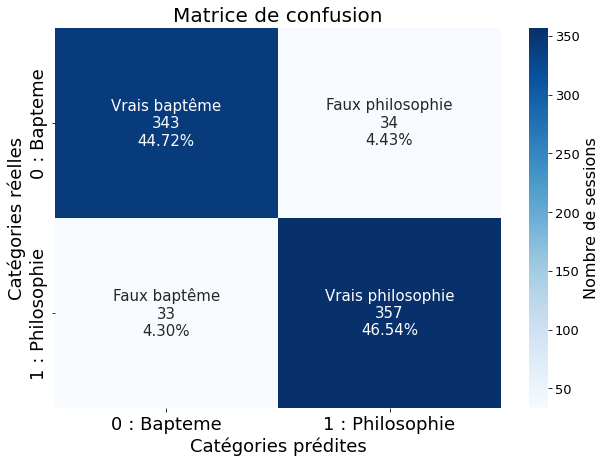

In [16]:
# Matrice de confusion
false_label = "0 : Bapteme"
true_label = "1 : Philosophie"
confusion_matrix_var = confusion_matrix(y_test, y_pred, labels=model.classes_)
group_names = ["Vrais baptême", "Faux philosophie", "Faux baptême", "Vrais philosophie"]
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix_var.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix_var.flatten()/np.sum(confusion_matrix_var)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
font_size = 15 #19
plt.rcParams["figure.figsize"] = (10, 7) #taille du graphique, taille du plot
ax = sb.heatmap(confusion_matrix_var, 
                annot=labels, fmt="", cmap='Blues',
                annot_kws={"size": font_size}, 
                cbar_kws={'label': 'Nombre de sessions'})
ax.set_xticklabels([false_label, true_label], Fontsize=font_size + 3)
ax.set_yticklabels([false_label, true_label], Fontsize=font_size + 3)
ax.figure.axes[-1].yaxis.label.set_size(font_size + 1)
ax.figure.axes[-1].tick_params(labelsize=font_size - 2) 
plt.title("Matrice de confusion", fontsize = font_size + 5)
# xlabel = 'Catégories prédites\n\n Exactitude (bien classés) = {:0.2f} % ; Inexactitude (mal classés) = {:0.2f} %\n Précision (bonnes prédictions de robots / qualité) = {:0.2f} %\n Rappel (nombre de robots détectés / quantité) = {:0.2f} %\n F1 (synthèse de précision + rappel) = {:0.2f} %'.format(accuracy, (100 - accuracy), precision, recall, f1_score)
plt.xlabel("Catégories prédites", fontsize=font_size + 3)
plt.ylabel("Catégories réelles", fontsize=font_size + 3)

c:\Users\eupho\OneDrive\Documents\perso\projets\classification_texte_articles_version_objet\sources\classification\tfidf\..\lib_classification.py:245: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xticklabels([false_label, true_label], Fontsize=font_size + 3)
c:\Users\eupho\OneDrive\Documents\perso\projets\classification_texte_articles_version_objet\sources\classification\tfidf\..\lib_classification.py:246: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_yticklabels([false_label, true_label], Fontsize=font_size + 3)


IndexError: Replacement index 2 out of range for positional args tuple

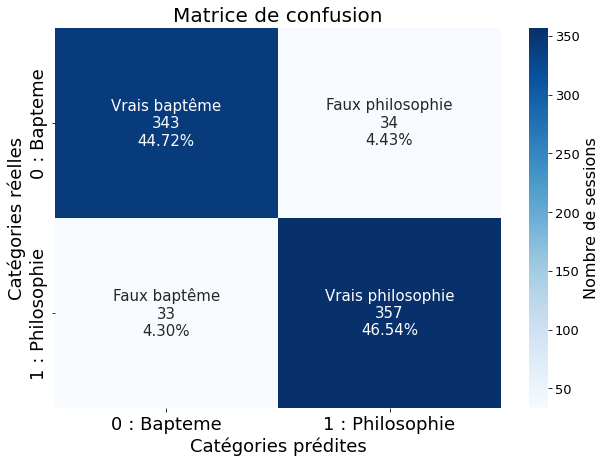

In [17]:
get_confusion_matrix(y_test, y_pred, model, savefig=True, dataset_name=dataset_name, plotfig=True)

In [ ]:
# Metriques
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       115
           1       0.98      0.94      0.96       121

    accuracy                           0.96       236
   macro avg       0.96      0.96      0.96       236
weighted avg       0.96      0.96      0.96       236



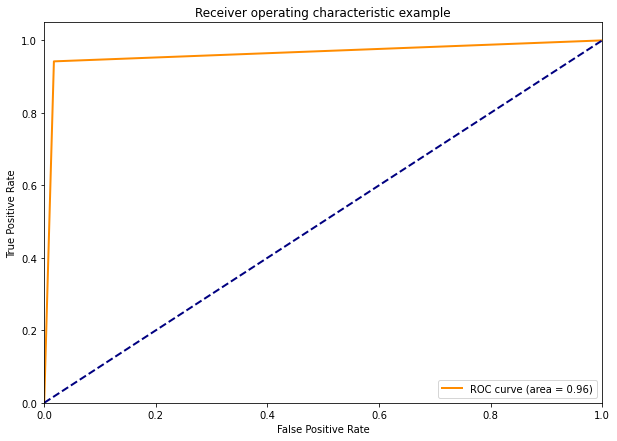

In [ ]:
# Courbe ROC et AUC
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# On affiche les documents a propos desquels le modele s'est trompe
corpus_test = pd.DataFrame({"id":corpus.iloc[indices_test].id, "message": corpus.iloc[indices_test].message, "truth":y_test, "pred":y_pred})
corpus_test_errors = corpus_test.query("truth != pred")
print(corpus_test.shape)
print(corpus_test_errors.shape)
# corpus_test_errors = corpus_test_errors[["truth", "pred", "message_preprocessed"]]
print(corpus_test_errors.columns)
corpus_test_errors = corpus_test_errors[["id", "truth", "pred", "message"]]
# corpus_test_errors

(236, 4)
(9, 4)
Index(['id', 'message', 'truth', 'pred'], dtype='object')


In [ ]:
with pd.option_context("display.max_rows", 1000):
    display(corpus.iloc[corpus_test_errors[corpus_test_errors["pred"] == 1].id]) 

,id,message,message_preprocessed,category,length,category_bin
662,662,"Dans les deux derniers cas, cela ne peut être donné qu’aux créatures rationnelles, c’est-à-dire les hommes et les anges.",deux dernier cas cela peut être donné créature rationnelles est-à-dire homme ange,epistemology,120,0
518,518,"La scolastique réformée a été un grand don à l’Église qui a été largement sous-estimé ou ignoré dans notre contexte actuel. Ceux qui veulent embrasser la théologie réformée ont besoin de connaître quelque chose de notre histoire réformée. La lecture de l’Institution de Calvin est un bon début, mais c’est juste un début. Même une connaissance superficielle de la scolastique, que cette série ne vise qu’à résumer, ne peut que nous aider à éviter de faire de fausses suppositions sur la scolastique réformée.",scolastique réformée a grand don église a largement sous-estimé ignoré contexte actuel ceux veulent embrasser théologie réformée besoin connaître quelque chose histoire réformée lecture institution calvin bon début juste début connaissance superficielle scolastique cette série vise résumer peut aider éviter faire faux supposition scolastique réformée,epistemology,508,0


In [ ]:
with pd.option_context("display.max_rows", 1000):
    display(corpus.iloc[corpus_test_errors[corpus_test_errors["pred"] == 0].id]) #faux bapteme

#faux exemples a enlever : commentaires, description auteur, texte anglais, references bibliographiques

,id,message,message_preprocessed,category,length,category_bin
39,39,## [Une espérance en ces temps troublés — Timothy Keller — Recension](https://parlafoi.fr/2022/10/25/une-esperance-en-ces-temps-troubles- timothy-keller-recension/),espérance temps troublés — timothy keller — recensionhttpsparlafoifrune-esperance-en-ces-temps-troubles- timothy-keller-recension,middle_age,164,1
208,208,"Le point de vue de Van Til sur la scolastique a peut-être été influencé par la littérature secondaire dont il disposait au début et au milieu du XXe siècle. La compréhension de la scolastique que l’on trouve dans ces sources a cependant fait l’objet d’un examen approfondi au cours des dernières décennies et a été jugée insuffisante20. La scolastique n’est pas une doctrine particulière. [C’était une méthode](https://parlafoi.fr/la-scolastique- protestante/) conçue pour les écoles, d’où le nom de « scolastique. » Le terme scolastique « désigne donc avant tout une méthode et non un contenu particulier : la méthode pouvait (et était) appliquée à une grande variété de contenus théologiques et elle pouvait (et était) aussi applicable à d’autres disciplines universitaires21. »",point vue van til scolastique a peut-être influencé littérature secondaire dont disposait début milieu xxe siècle compréhension scolastique trouve source a cependant fait objet examen approfondi cour dernier décennie a jugée insuffisante scolastique doctrine particulière cétait méthodehttpsparlafoifrla-scolastique- protestant conçue école où nom « scolastique » terme scolastique « désigne donc avant tout méthode non contenu particulier méthode pouvait appliquée grand variété contenu théologiques pouvait aussi applicable autres discipline universitaire »,middle_age,780,1
86,86,"14. D’AQUIN, Thomas, _On the Power of God_ , Q. 3, art. 1. Dans l’œuvre de Thomas d’Aquin, la distinction entre le Créateur et la créature est décrite de diverses manières. Dieu est acte pur alors que les créatures consistent en un assemblage d’acte de de puissance. Dieu est son propre être alors que les créatures reçoivent leur être de Dieu. Dieu est un être nécessaire alors que les créatures sont des êtres contingents. Dieu est le premier et la cause première et les créatures sont des effets.[↩]",aquin thomas the power of god q art œuvre thomas aquin distinction entre créateur créature décrite diverses manière dieu acte pur alors créature consistent assemblage acte puissance dieu propre être alors créature reçoivent être dieu dieu être nécessaire alors créature être contingent dieu premier cause première créature effets↩,middle_age,504,1
324,324,Votre adresse e-mail ne sera pas publiée. Les champs obligatoires sont indiqués avec *,adresse e-mail publiée champ obligatoires indiqués,middle_age,86,1
525,525,"Enfant de Dieu, passionné par la théologie et la philosophie. S'il est enfant de Dieu, c'est exclusivement en vertu des mérites de Jésus-Christ et de la grâce de Dieu. Si Dieu le veut, il se fiancera bientôt !",enfant dieu passionné théologie philosophie enfant dieu exclusivement vertu mérite jésus-christ grâce dieu si dieu veut fiancera bientôt,middle_age,209,1
289,289,"Ces derniers jours, j’ai lu ces deux articles sur la distinction et l’interaction entre la révélation générale et la révélation spéciale dans la perspective de l’apologétique classique sur le site web de Ligonier Ministries ; une bonne maîtrise de ces notions me semble incontournable en matière de défense de la foi chrétienne…",dernier jour lu deux article distinction interaction entre révélation générale révélation spéciale perspective apologétique classique site web ligonier ministries bonne maîtrise notion semble incontournable matière défense foi chrétienne…,middle_age,328,1
650,650,"La façon logique de procéder me semble être d’établir, en ordre : Théisme → Monothéisme → Trinitarisme → Protestantisme → Foi réformée.",façon logique procéder semble être établir ordre théisme → monothéisme → trinitarisme → protestantisme → foi réformé